In [70]:
using LightGraphs
using MatrixNetworks
using VegaDatasets
using LinearAlgebra
using SparseArrays
using Plots
using VegaLite
using DataFrames


In [15]:
airports= dataset("airports")


iata,name,city,state,country,latitude,longitude
"""00M""","""Thigpen""","""Bay Springs""","""MS""","""USA""",31.9538,-89.2345
"""00R""","""Livingston Municipal""","""Livingston""","""TX""","""USA""",30.6859,-95.0179
"""00V""","""Meadow Lake""","""Colorado Springs""","""CO""","""USA""",38.9457,-104.57
"""01G""","""Perry-Warsaw""","""Perry""","""NY""","""USA""",42.7413,-78.0521
"""01J""","""Hilliard Airpark""","""Hilliard""","""FL""","""USA""",30.688,-81.9059
"""01M""","""Tishomingo County""","""Belmont""","""MS""","""USA""",34.4917,-88.2011
"""02A""","""Gragg-Wade""","""Clanton""","""AL""","""USA""",32.8505,-86.6115
"""02C""","""Capitol""","""Brookfield""","""WI""","""USA""",43.0875,-88.1779
"""02G""","""Columbiana County""","""East Liverpool""","""OH""","""USA""",40.6733,-80.6414
"""03D""","""Memphis Memorial""","""Memphis""","""MO""","""USA""",40.4473,-92.227


In [16]:
D = DataFrame(airports)

Row,iata,name,city,state,country,latitude,longitude
,String,String,String,String,String,Float64,Float64
1,00M,Thigpen,Bay Springs,MS,USA,31.9538,-89.2345
2,00R,Livingston Municipal,Livingston,TX,USA,30.6859,-95.0179
3,00V,Meadow Lake,Colorado Springs,CO,USA,38.9457,-104.57
4,01G,Perry-Warsaw,Perry,NY,USA,42.7413,-78.0521
5,01J,Hilliard Airpark,Hilliard,FL,USA,30.688,-81.9059
6,01M,Tishomingo County,Belmont,MS,USA,34.4917,-88.2011
7,02A,Gragg-Wade,Clanton,AL,USA,32.8505,-86.6115
8,02C,Capitol,Brookfield,WI,USA,43.0875,-88.1779
9,02G,Columbiana County,East Liverpool,OH,USA,40.6733,-80.6414


In [17]:
flightsairport = dataset("flights-airport")

origin,destination,count
"""ABE""","""ATL""",853
"""ABE""","""BHM""",1
"""ABE""","""CLE""",805
"""ABE""","""CLT""",465
"""ABE""","""CVG""",247
"""ABE""","""DTW""",997
"""ABE""","""JFK""",3
"""ABE""","""LGA""",9
"""ABE""","""ORD""",1425
"""ABE""","""PHL""",2


In [18]:
D2 = DataFrame(flightsairport)

Row,origin,destination,count
,String,String,Int64
1,ABE,ATL,853
2,ABE,BHM,1
3,ABE,CLE,805
4,ABE,CLT,465
5,ABE,CVG,247
6,ABE,DTW,997
7,ABE,JFK,3
8,ABE,LGA,9
9,ABE,ORD,1425


In [28]:
allairports = vcat(D2[!,:origin], D2[!,:destination])
uairports = unique(allairports)

305-element Vector{String}:
 "ABE"
 "ABI"
 "ABQ"
 "ABY"
 "ACK"
 "ACT"
 "ACV"
 "ACY"
 "ADK"
 "ADQ"
 "AEX"
 "AGS"
 "AKN"
 ⋮
 "TYR"
 "TYS"
 "VLD"
 "VPS"
 "WRG"
 "WYS"
 "XNA"
 "YAK"
 "YKM"
 "YUM"
 "CYS"
 "OGD"

In [19]:
x = [1;2;3;7;90]
length(x)

5

In [20]:
p = [1,45,80,3,0]


5-element Vector{Int64}:
  1
 45
 80
  3
  0

In [21]:
s = vcat(x,p)

10-element Vector{Int64}:
  1
  2
  3
  7
 90
  1
 45
 80
  3
  0

In [22]:
A = [2 3 0]
B = [8 9 44]

1×3 Matrix{Int64}:
 8  9  44

In [23]:
C = vcat(A,B)

2×3 Matrix{Int64}:
 2  3   0
 8  9  44

In [29]:
using Random
Random.seed!(0) # ensure repeatable results...
using NearestNeighbors, Distributions, SparseArrays

function spatial_graph_edges(n::Integer,d::Integer;degreedist=LogNormal(log(4),1))
  xy = rand(d,n)
  T = BallTree(xy)
  # form the edges for sparse
  ei = Int[]
  ej = Int[]
  for i=1:n
    deg = min(ceil(Int,rand(degreedist)),n-1)
    idxs, dists = knn(T, xy[:,i], deg+1)
    for j in idxs
      if i != j
        push!(ei,i)
        push!(ej,j)
      end
    end
  end
  return xy, ei, ej
end

spatial_graph_edges (generic function with 1 method)

In [54]:
function spatial_network(n::Integer, d::Integer; degreedist=LogNormal(log(3),1))
  xy, ei, ej = spatial_graph_edges(n, d;degreedist=degreedist)
  A = sparse(ei,ej,1,n,n)
  return max.(A,A'), xy
end
A,xy = spatial_network(300, 2)

(sparse([10, 40, 52, 108, 121, 127, 153, 171, 184, 200  …  246, 268, 271, 21, 137, 139, 146, 148, 253, 276], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  299, 299, 299, 300, 300, 300, 300, 300, 300, 300], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 300, 300), [0.6413368396430649 0.14672660554759076 … 0.40480663597544164 0.9867457077267991; 0.279152801112898 0.25585187601290504 … 0.5746618529184696 0.34822796654642496])

In [55]:
using Plots
function plotgraph(A::SparseMatrixCSC,xy::AbstractArray{T,2};kwargs...) where T
  px,py = zeros(T,0),zeros(T,0)
  P = [px,py]
  rows = rowvals(A)
  skip = NaN.*xy[:,begin] # first row
  for j=1:size(A,2) # for each column
    for nzi in nzrange(A, j)
      i = rows[nzi]
      if i > j
        push!.(P, @view xy[:,i])
        push!.(P, @view xy[:,j])
        push!.(P, skip)
      end
    end
  end
  plot(px,py;framestyle=:none,legend=false,kwargs...)
end

plotgraph (generic function with 1 method)

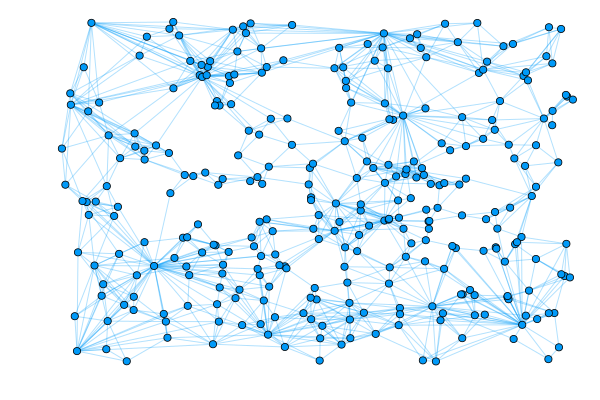

In [56]:
plotgraph(A,xy,alpha=0.3); 
scatter!(xy[1,:],xy[2,:],
  markersize=4, markerstrokewidth=1, color=1)

In [63]:
p = 0.2
function evolve(x::Vector,  p::Real, A::AbstractMatrix)
    log_not_infected = log.(1 .- p.*x)
    y = 1 .- exp.(A*log_not_infected)
    y = max.(y, x)
end

evolve (generic function with 1 method)

[ Info: Saved animation to C:\Users\Hp\viral-first.gif


Plots.AnimatedGif("C:\\Users\\Hp\\viral-first.gif")
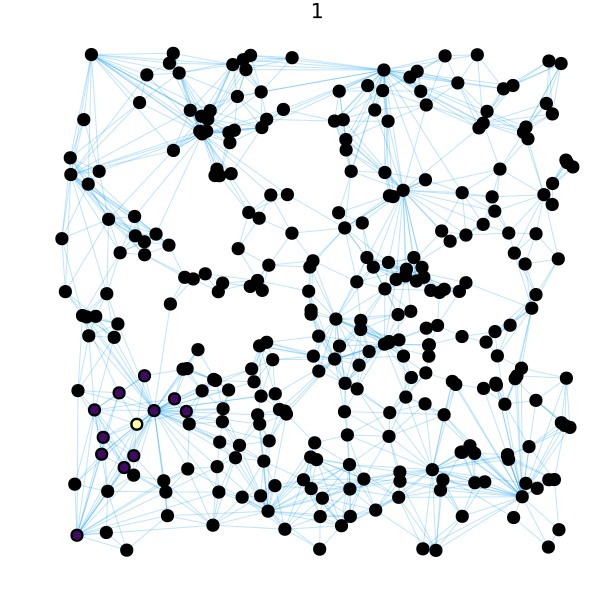

In [65]:
x = zeros(size(A,1))
x[2] = 1.0
anim = @animate for i=1:100
    global x = evolve(x, p, A)
    plotgraph(A,xy,alpha=0.25, size=(600,600))
    scatter!(xy[1,:],xy[2,:],
    markersize=6, markerstrokewidth=2,
    color=1, marker_z = x, clim=(0,1))
    title!("$i")
end
gif(anim, "viral-first.gif", fps=10)

In [66]:
function our_erdos_renyi(n::Int64,p::Float64)
    if p < 0 || p >= 1 error("the probablity value must be in the interval [0,1)") end
    A = rand(n,n)
    T = triu(A,1)
    T = sparse(triu(T.<p,1))
    return max.(T,T')
end

our_erdos_renyi (generic function with 1 method)

In [67]:
function our_pref_attach(n::Int64,n0::Int64,k::Int64)
    A = spzeros(Bool,n,n)
    C = ones(Int,n0,n0)-I
    A[1:n0,1:n0] .= C
    for i = n0+1:n
        degs = sum(A[1:i-1,1:i-1],dims=2)[:]
        degp = degs./sum(degs)
        c = cumsum(degp)
        r = rand(k)
        nodes = map(x->findfirst(c.>x),r)
        A[nodes,i] .= 1
        A[i,nodes] .= 1
    end
    return A
end

our_pref_attach (generic function with 1 method)

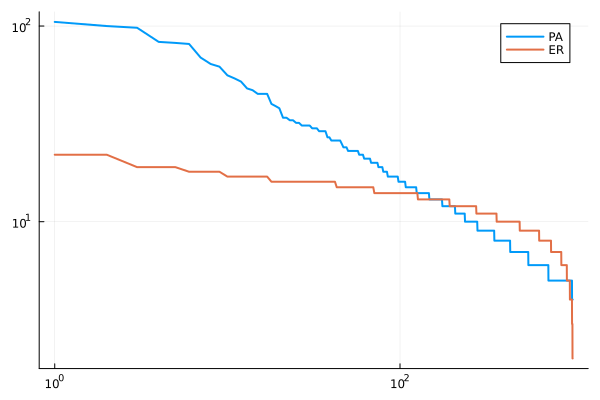

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Hp\.julia\packages\PlotUtils\mHQ0Q\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\Hp\.julia\packages\PlotUtils\mHQ0Q\src\ticks.jl:191


In [68]:
A = our_pref_attach(1000,5,5);
sp = nnz(A)/prod(size(A))
degs = sum(A,dims=2)[:];
plot(sort(degs,rev=true),axis=:log,
    linewidth = 2,label="PA")
B = our_erdos_renyi(1000,sp);
degs = sum(B,dims=2)[:];
plot!(sort(degs,rev=true),
    linewidth=2,label="ER")

In [87]:
using PlotlyJS
import GraphPlot

In [123]:
g = erdos_renyi_directed(60,1)

MatrixNetwork{Float64}(60, [1, 1, 1, 1, 1, 3, 3, 4, 4, 4  …  44, 47, 48, 49, 49, 50, 53, 53, 54, 56], [16, 24, 21, 1, 31, 41, 9, 9, 12, 32  …  56, 39, 42, 32, 22, 37, 43, 12, 4, 30], [0.3797677785029143, 0.706818414737288, 0.12142682800929927, 0.30180924765261097, 0.33185559850788415, 0.18190937449249345, 0.7703858039055105, 0.1782980789214279, 0.7387945286772022, 0.10342582110548582  …  0.20339288103613784, 0.7007690576296799, 0.39030626065329865, 0.6518273932119912, 0.2241746316293609, 0.6882989617061259, 0.4332952932181169, 0.9355911932471273, 0.8156719137695839, 0.25892520339185043])